In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
data= pd.read_csv('mushrooms.csv')

In [3]:
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [4]:
data.shape

(8124, 23)

In [5]:
data.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [7]:
data.isna().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [8]:
data.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


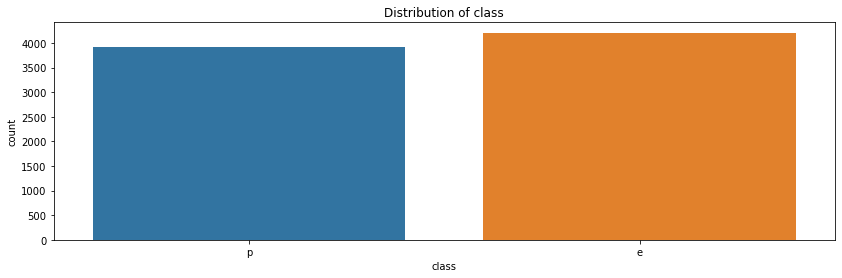

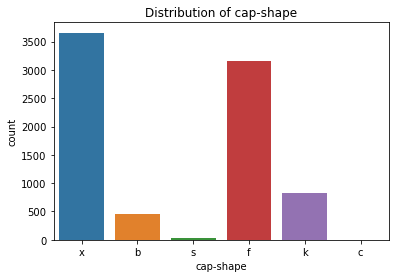

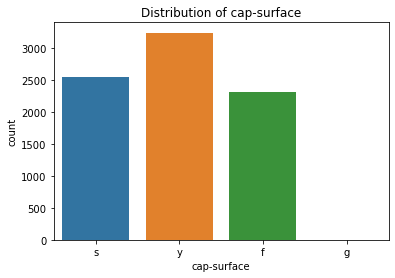

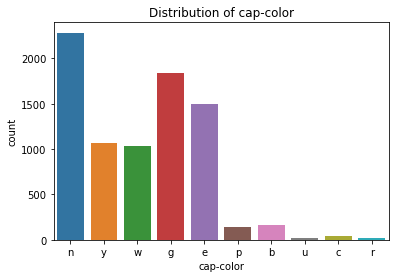

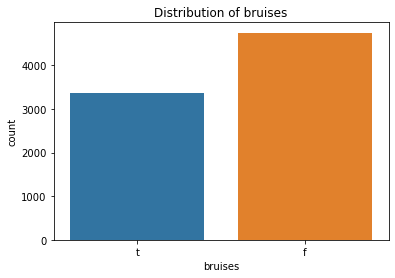

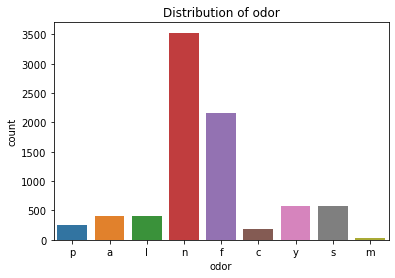

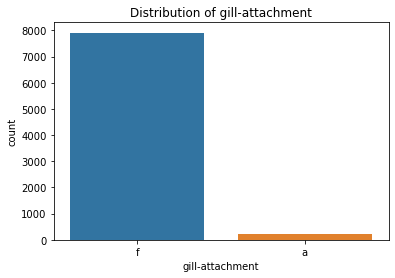

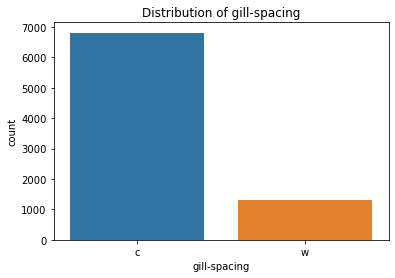

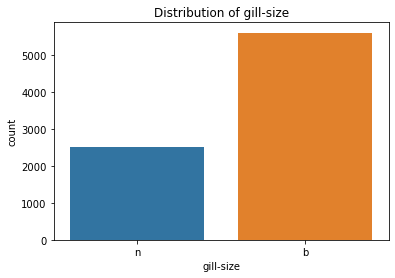

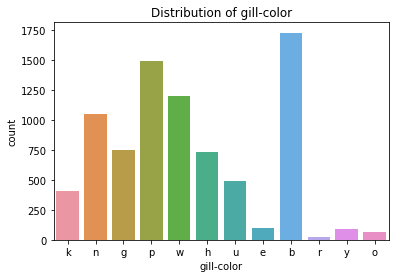

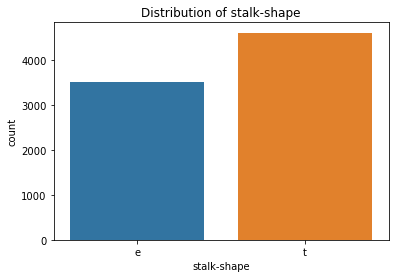

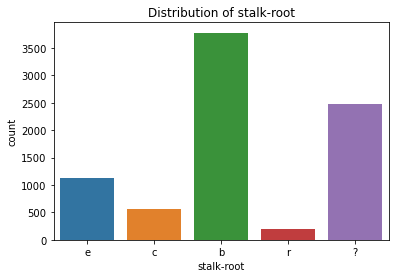

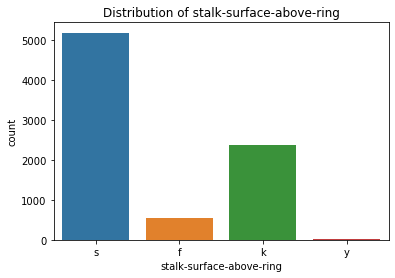

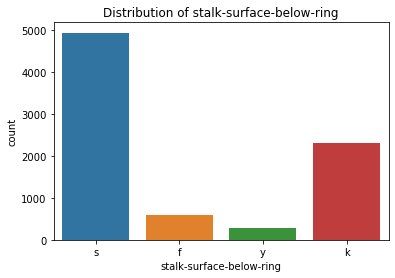

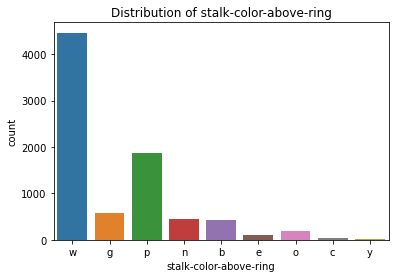

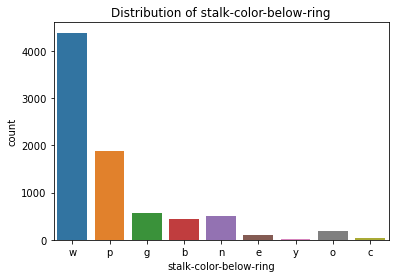

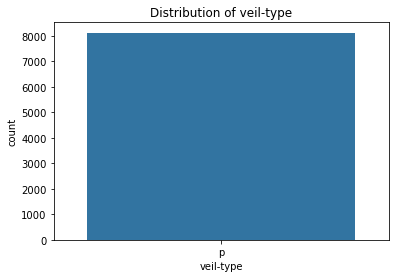

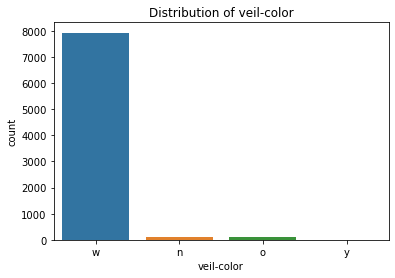

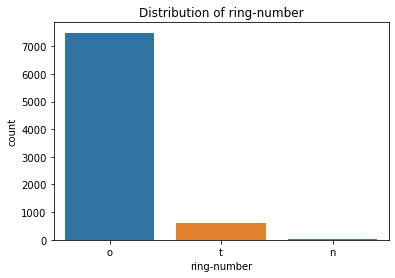

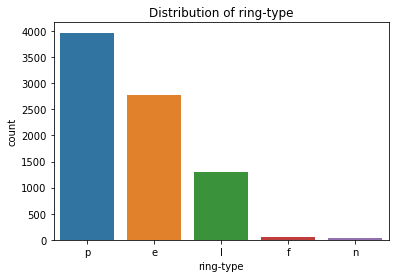

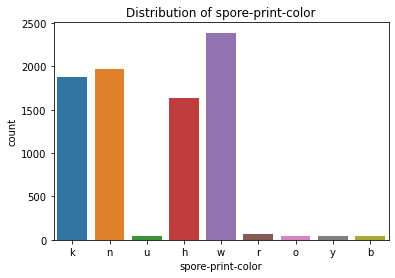

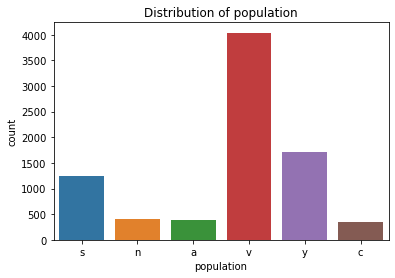

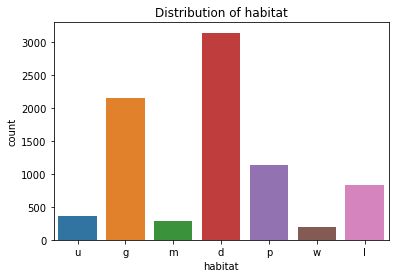

In [9]:
#Univariate plot
plt.figure(figsize=[14,4])
for i in data:
    sns.countplot(data[i])
    plt.title('Distribution of {}'.format(i))
    plt.show()

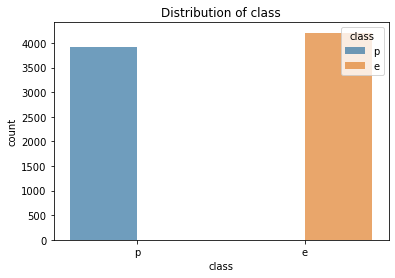

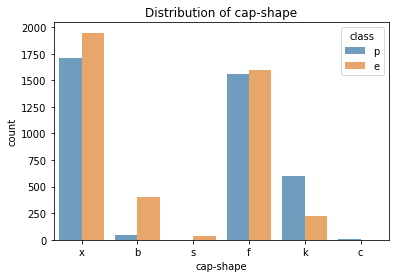

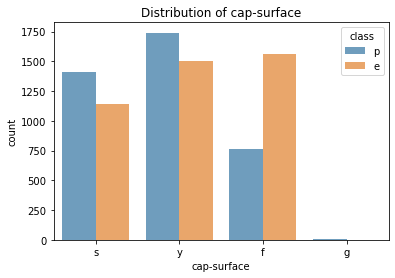

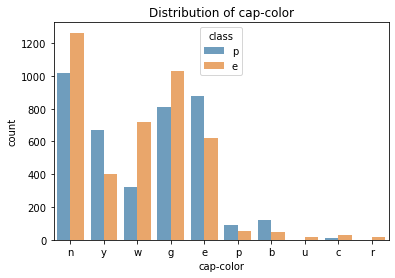

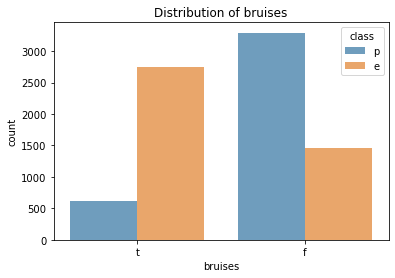

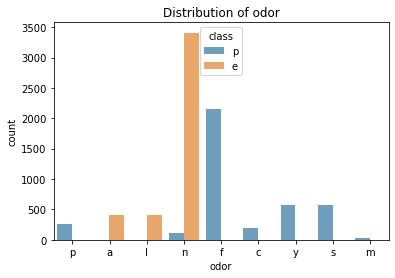

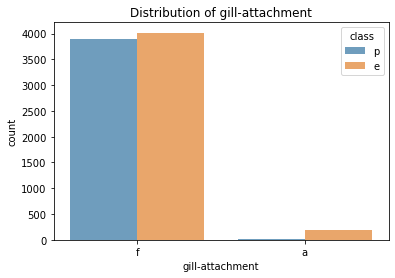

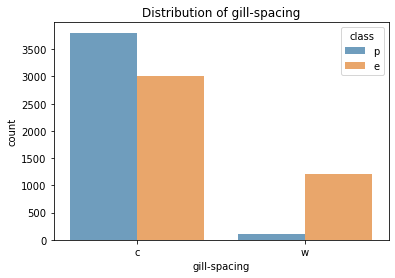

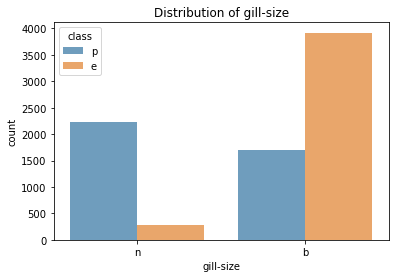

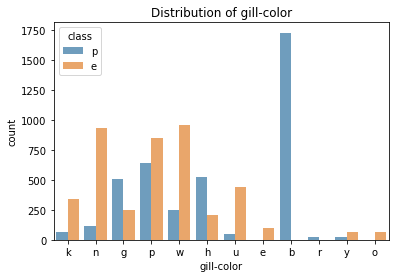

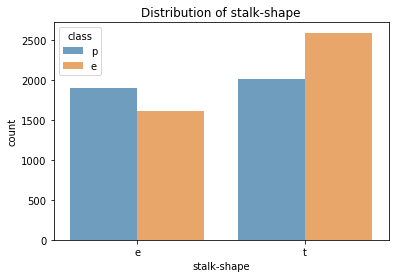

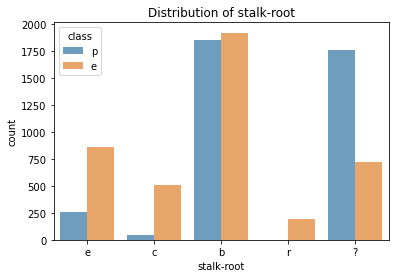

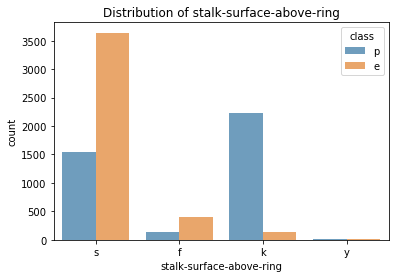

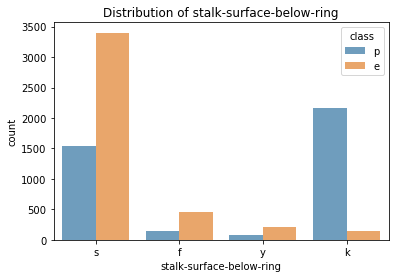

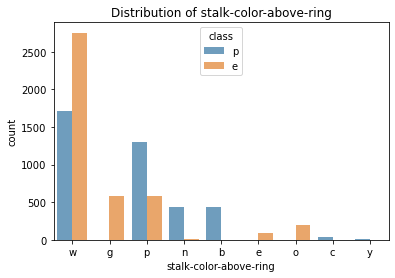

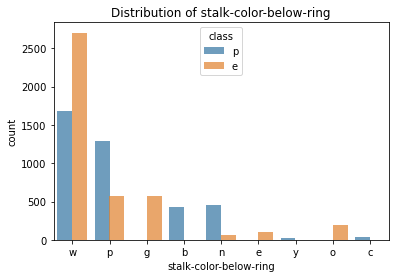

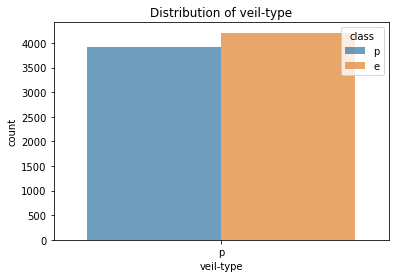

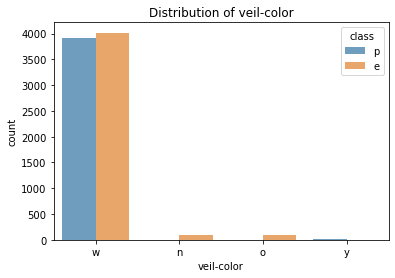

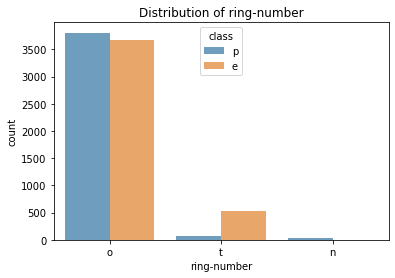

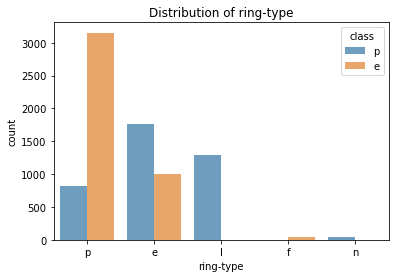

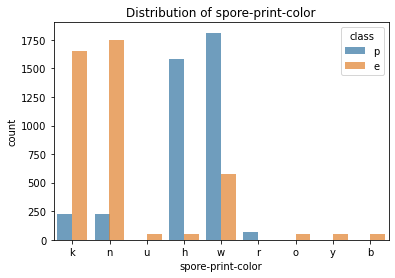

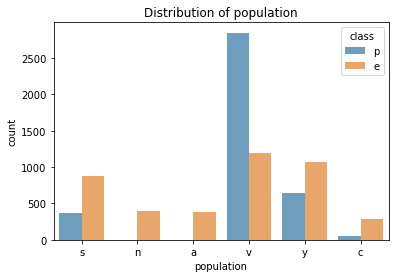

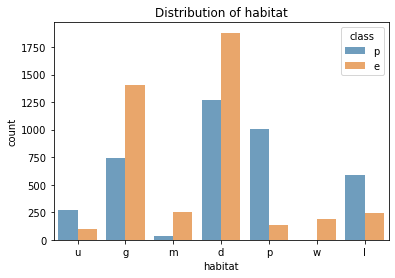

In [10]:
#Bivariate plot
for j in data:
    sns.countplot(x=j,hue='class', alpha=0.7, data=data)
    plt.title('Distribution of {}'.format(j))
    plt.show()

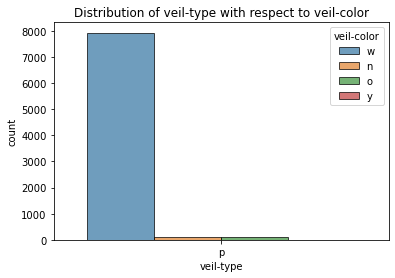

In [11]:
sns.countplot(x='veil-type',hue='veil-color',edgecolor="black", alpha=0.7, data=data)
plt.title('Distribution of veil-type with respect to veil-color')
plt.show()

In [12]:
data.groupby('veil-type')['veil-color'].value_counts()

veil-type  veil-color
p          w             7924
           n               96
           o               96
           y                8
Name: veil-color, dtype: int64

In [13]:
data.groupby('class')['veil-color'].value_counts()

class  veil-color
e      w             4016
       n               96
       o               96
p      w             3908
       y                8
Name: veil-color, dtype: int64

In [14]:
data.groupby('class')['veil-type'].value_counts()

class  veil-type
e      p            4208
p      p            3916
Name: veil-type, dtype: int64

- The veil-type p - 'partial' has almost equal number of 'p' and 'e' class, hence  veil-type column can be removed

In [15]:
data.drop('veil-type',axis=1,inplace=True)

In [16]:
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,s,w,w,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,s,w,w,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,s,w,w,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,s,w,w,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,s,w,w,w,o,e,n,a,g


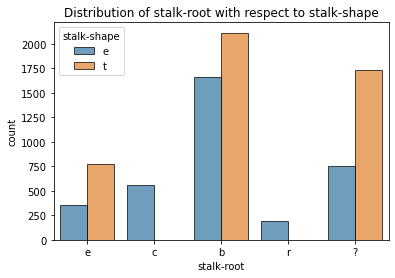

In [17]:
sns.countplot(x='stalk-root',hue='stalk-shape',edgecolor="black", alpha=0.7, data=data)
plt.title('Distribution of stalk-root with respect to stalk-shape')
plt.show()

In [ ]:
data.groupby(['class','stalk-shape'])['stalk-root'].value_counts()

There is a large number of values missing in stalk-root. It is not ideal to fill the missing values(?) using mode. Hence we can replace it as unknown-'u'

In [ ]:
data['stalk-root']=data['stalk-root'].replace('?','u')

In [ ]:
data['stalk-root'].unique()

In [ ]:
data['class'] = data['class'].replace(['p','e'], [0, 1])

In [ ]:
y= data['class']
data.drop('class',axis=1,inplace=True)
X=pd.get_dummies(data)
X

In [ ]:
data.dtypes

In [ ]:
data.isna().sum()

# Modellling

In [ ]:
X.describe()

In [ ]:
#spliting of data
from  sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
X_train.shape

In [ ]:
X_test.shape

## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
logit_model =LogisticRegression()
logit_model.fit(X_train,y_train)
y_pre=logit_model.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score,precision_score,recall_score,f1_score,plot_confusion_matrix
print('Accuracy is:', accuracy_score(y_test, y_pre))
print('f1_score is:', f1_score(y_test, y_pre, average = 'macro'))
print("Precision score :",precision_score(y_test,y_pre,average='macro'))
print("Recall_score :",recall_score(y_test,y_pre,average='macro'))

In [ ]:
confusion_matrix(y_test, y_pre)

## KNN 

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
acc_values=[]
neighbors=np.arange(3,15)
for k in neighbors:
    Classifier = KNeighborsClassifier(n_neighbors=k,metric='minkowski')
    Classifier.fit(X_train,y_train)
    y_pre=Classifier.predict(X_test)
    acc=accuracy_score(y_test,y_pre)
    acc_values.append(acc)

In [ ]:
plt.plot(neighbors,acc_values,'o-')
plt.xlabel('k value')
plt.ylabel('acccuracy')

In [ ]:
Classifier = KNeighborsClassifier(n_neighbors=4,metric='minkowski')
Classifier.fit(X_train,y_train)
y_pre=Classifier.predict(X_test)


In [ ]:
print('Accuracy is:', accuracy_score(y_test, y_pre))
print('f1_score is:', f1_score(y_test, y_pre, average = 'macro'))
print("Precision score :",precision_score(y_test,y_pre,average='macro'))
print("Recall_score :",recall_score(y_test,y_pre,average='macro'))

In [ ]:
confusion_matrix(y_test, y_pre)

## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(n_estimators = 20, random_state = 42)
RF.fit(X_train, y_train)
y_pre = RF.predict(X_test)

In [ ]:
print('Accuracy is:', accuracy_score(y_test, y_pre))
print('f1_score is:', f1_score(y_test, y_pre, average = 'macro'))
print("Precision score :",precision_score(y_test,y_pre,average='macro'))
print("Recall_score :",recall_score(y_test,y_pre,average='macro'))

In [ ]:
confusion_matrix(y_test, y_pre)

## kernal SVM

In [ ]:
from sklearn.svm import SVC
svm = SVC(kernel = 'rbf',C=1,gamma='auto', random_state = 0)
svm.fit(X_train, y_train)
y_pre = svm.predict(X_test)

In [ ]:
print('Accuracy is:', accuracy_score(y_test, y_pre))
print('f1_score is:', f1_score(y_test, y_pre, average = 'macro'))
print("Precision score :",precision_score(y_test,y_pre,average='macro'))
print("Recall_score :",recall_score(y_test,y_pre,average='macro'))

In [ ]:
confusion_matrix(y_test, y_pre)

## Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt_model=DecisionTreeClassifier(criterion= 'entropy')
dt_model.fit(X_train,y_train)
y_pre=dt_model.predict(X_test)

In [ ]:
print('Accuracy is:', accuracy_score(y_test, y_pre))
print('f1_score is:', f1_score(y_test, y_pre, average = 'macro'))
print("Precision score :",precision_score(y_test,y_pre,average='macro'))
print("Recall_score :",recall_score(y_test,y_pre,average='macro'))

In [ ]:
confusion_matrix(y_test, y_pre)

## Gaussiam Naive Bayes Classifier

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb= GaussianNB()
gnb.fit(X_train, y_train)
y_pre = gnb.predict(X_test)

In [ ]:
print('Accuracy is:', accuracy_score(y_test, y_pre))
print('f1_score is:', f1_score(y_test, y_pre, average = 'macro'))
print("Precision score :",precision_score(y_test,y_pre,average='macro'))
print("Recall_score :",recall_score(y_test,y_pre,average='macro'))

In [ ]:
confusion_matrix(y_test, y_pre)

## Bernoulli Naive Bayes

In [ ]:
from sklearn.naive_bayes import BernoulliNB
bnb=BernoulliNB()
bnb.fit(X_train, y_train)
y_pre=bnb.predict(X_test)

In [ ]:
print('Accuracy is:', accuracy_score(y_test, y_pre))
print('f1_score is:', f1_score(y_test, y_pre, average = 'macro'))
print("Precision score :",precision_score(y_test,y_pre,average='macro'))
print("Recall_score :",recall_score(y_test,y_pre,average='macro'))

In [ ]:
confusion_matrix(y_test, y_pre)

## Multinomial Naive Bayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
mnb.fit(X_train,y_train)
y_pre=mnb.predict(X_test)

In [ ]:
print('Accuracy is:', accuracy_score(y_test, y_pre))
print('f1_score is:', f1_score(y_test, y_pre, average = 'macro'))
print("Precision score :",precision_score(y_test,y_pre,average='macro'))
print("Recall_score :",recall_score(y_test,y_pre,average='macro'))

In [ ]:
confusion_matrix(y_test, y_pre)